In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['ggplot'])

In [ ]:
# Reference
[Stanford CS229 Machine Learning: Linear Regression and Gradient Descent]("https://www.youtube.com/playlist?list=PLoROMvodv4rMiGQp3WXShtMGgzqpfVfbU")

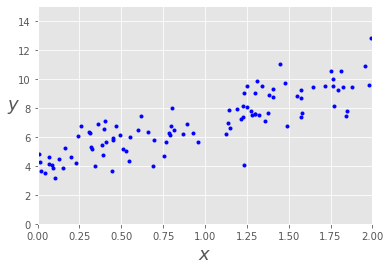

In [5]:
# Create Data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, 'b.')
plt.xlabel("$x$", fontsize = 18)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
_ = plt.axis([0, 2, 0, 15])

theta_best: [[4.080876]
 [3.012017]]
y_predict: [[ 4.080876]
 [10.10491 ]]


(0.0, 2.0, 0.0, 15.0)

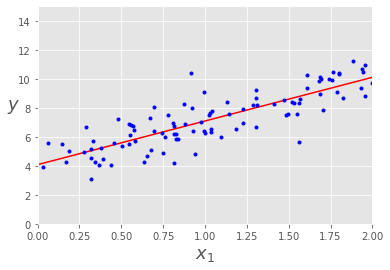

In [11]:
# Analytical way of Linear Regression
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print("theta_best: {}".format(theta_best))

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
print("y_predict: {}".format(y_predict))

plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.axis([0, 2, 0, 15])

# Gradient Descent
## Cost Function & Gradients

The equation for calculating cost function and gradients are as shown below. Please note the cost function is for Linear regression. For other algorithms the cost function will be different and the gradients would have to be derived from the cost functions

### Cost
$J(\theta) = {1 \over 2m} \sum_{i=1}^{m}(h(\theta)^{(i)} - y^{(i)})^2$

### Gradient
$\frac{\partial J(\theta)}{\partial \theta_j} = {1 \over m} \sum_{i=1}^{m}(h(\theta)^{(i)} - y^{(i)}) \cdot X_j^{(i)}$

### Gradients
$\theta_0 := \theta_0 - \alpha ({1 \over m} \sum_{i=1}^{m} (h(\theta^{(i)} - y^{(i)}) \cdot X_0^{(i)}))$

$\theta_j := \theta_j - \alpha ({1 \over m} \sum_{i=1}^{m} (h(\theta^{(i)} - y^{(i)}) \cdot X_j^{(i)}))$

In [18]:
# Loss function
def  cal_cost(theta, X, y):
    '''
    
    Calculates the cost for given X and Y. The following shows a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(theta)
    # assert m == len(predictions)
    cost = (1/(2 * m)) * np.sum(np.square(predictions - y))   
    return cost

# Gradeint Descent
def gradient_descent(X, y, theta, learning_rate = 0.01, iterations = 100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta = Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))

    for it in range(iterations):
        prediction = np.dot(X,theta)
        
        theta = theta - (1 / m) * learning_rate * ( X.T.dot((prediction - y)))
        theta_history[it, :] = theta.T
        cost_history[it]  = cal_cost(theta, X, y)
        
    return theta, cost_history, theta_history

Theta0:          3.727,
Theta1:          3.310
Final cost/MSE:  0.563


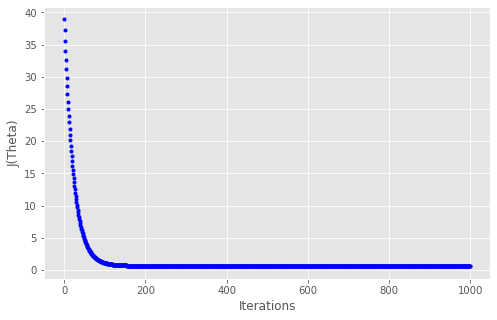

In [22]:
lr = 0.01
n_iter = 1000

theta = np.random.randn(2, 1)

X_b = np.c_[np.ones((len(X), 1)), X]
theta, cost_history, theta_history = gradient_descent(X_b, y, theta, lr, n_iter)

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))


fig, ax = plt.subplots(figsize=(8, 5))
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_ = ax.plot(range(n_iter),cost_history,'b.')

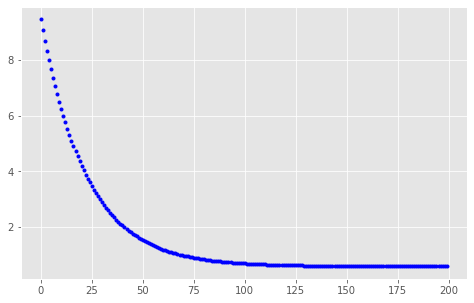

In [25]:
fig,ax = plt.subplots(figsize=(8,5))
_ = ax.plot(range(200), cost_history[:200], 'b.')

In [26]:
def plot_GD(n_iter, lr, ax, ax1 = None):
     """
     n_iter = no of iterations
     lr = Learning Rate
     ax = Axis to plot the Gradient Descent
     ax1 = Axis to plot cost_history vs Iterations plot

     """
     _ = ax.plot(X, y,'b.')
     theta = np.random.randn(2, 1)

     tr = 0.1
     cost_history = np.zeros(n_iter)

     for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta, h, _ = gradient_descent(X_b, y, theta, lr, 1)
        pred = X_b.dot(theta)

        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(X, pred, 'r-', alpha = tr)
            if tr < 0.8:
                tr = tr + 0.2
     if not ax1 == None:
        _ = ax1.plot(range(n_iter) ,cost_history, 'b.')


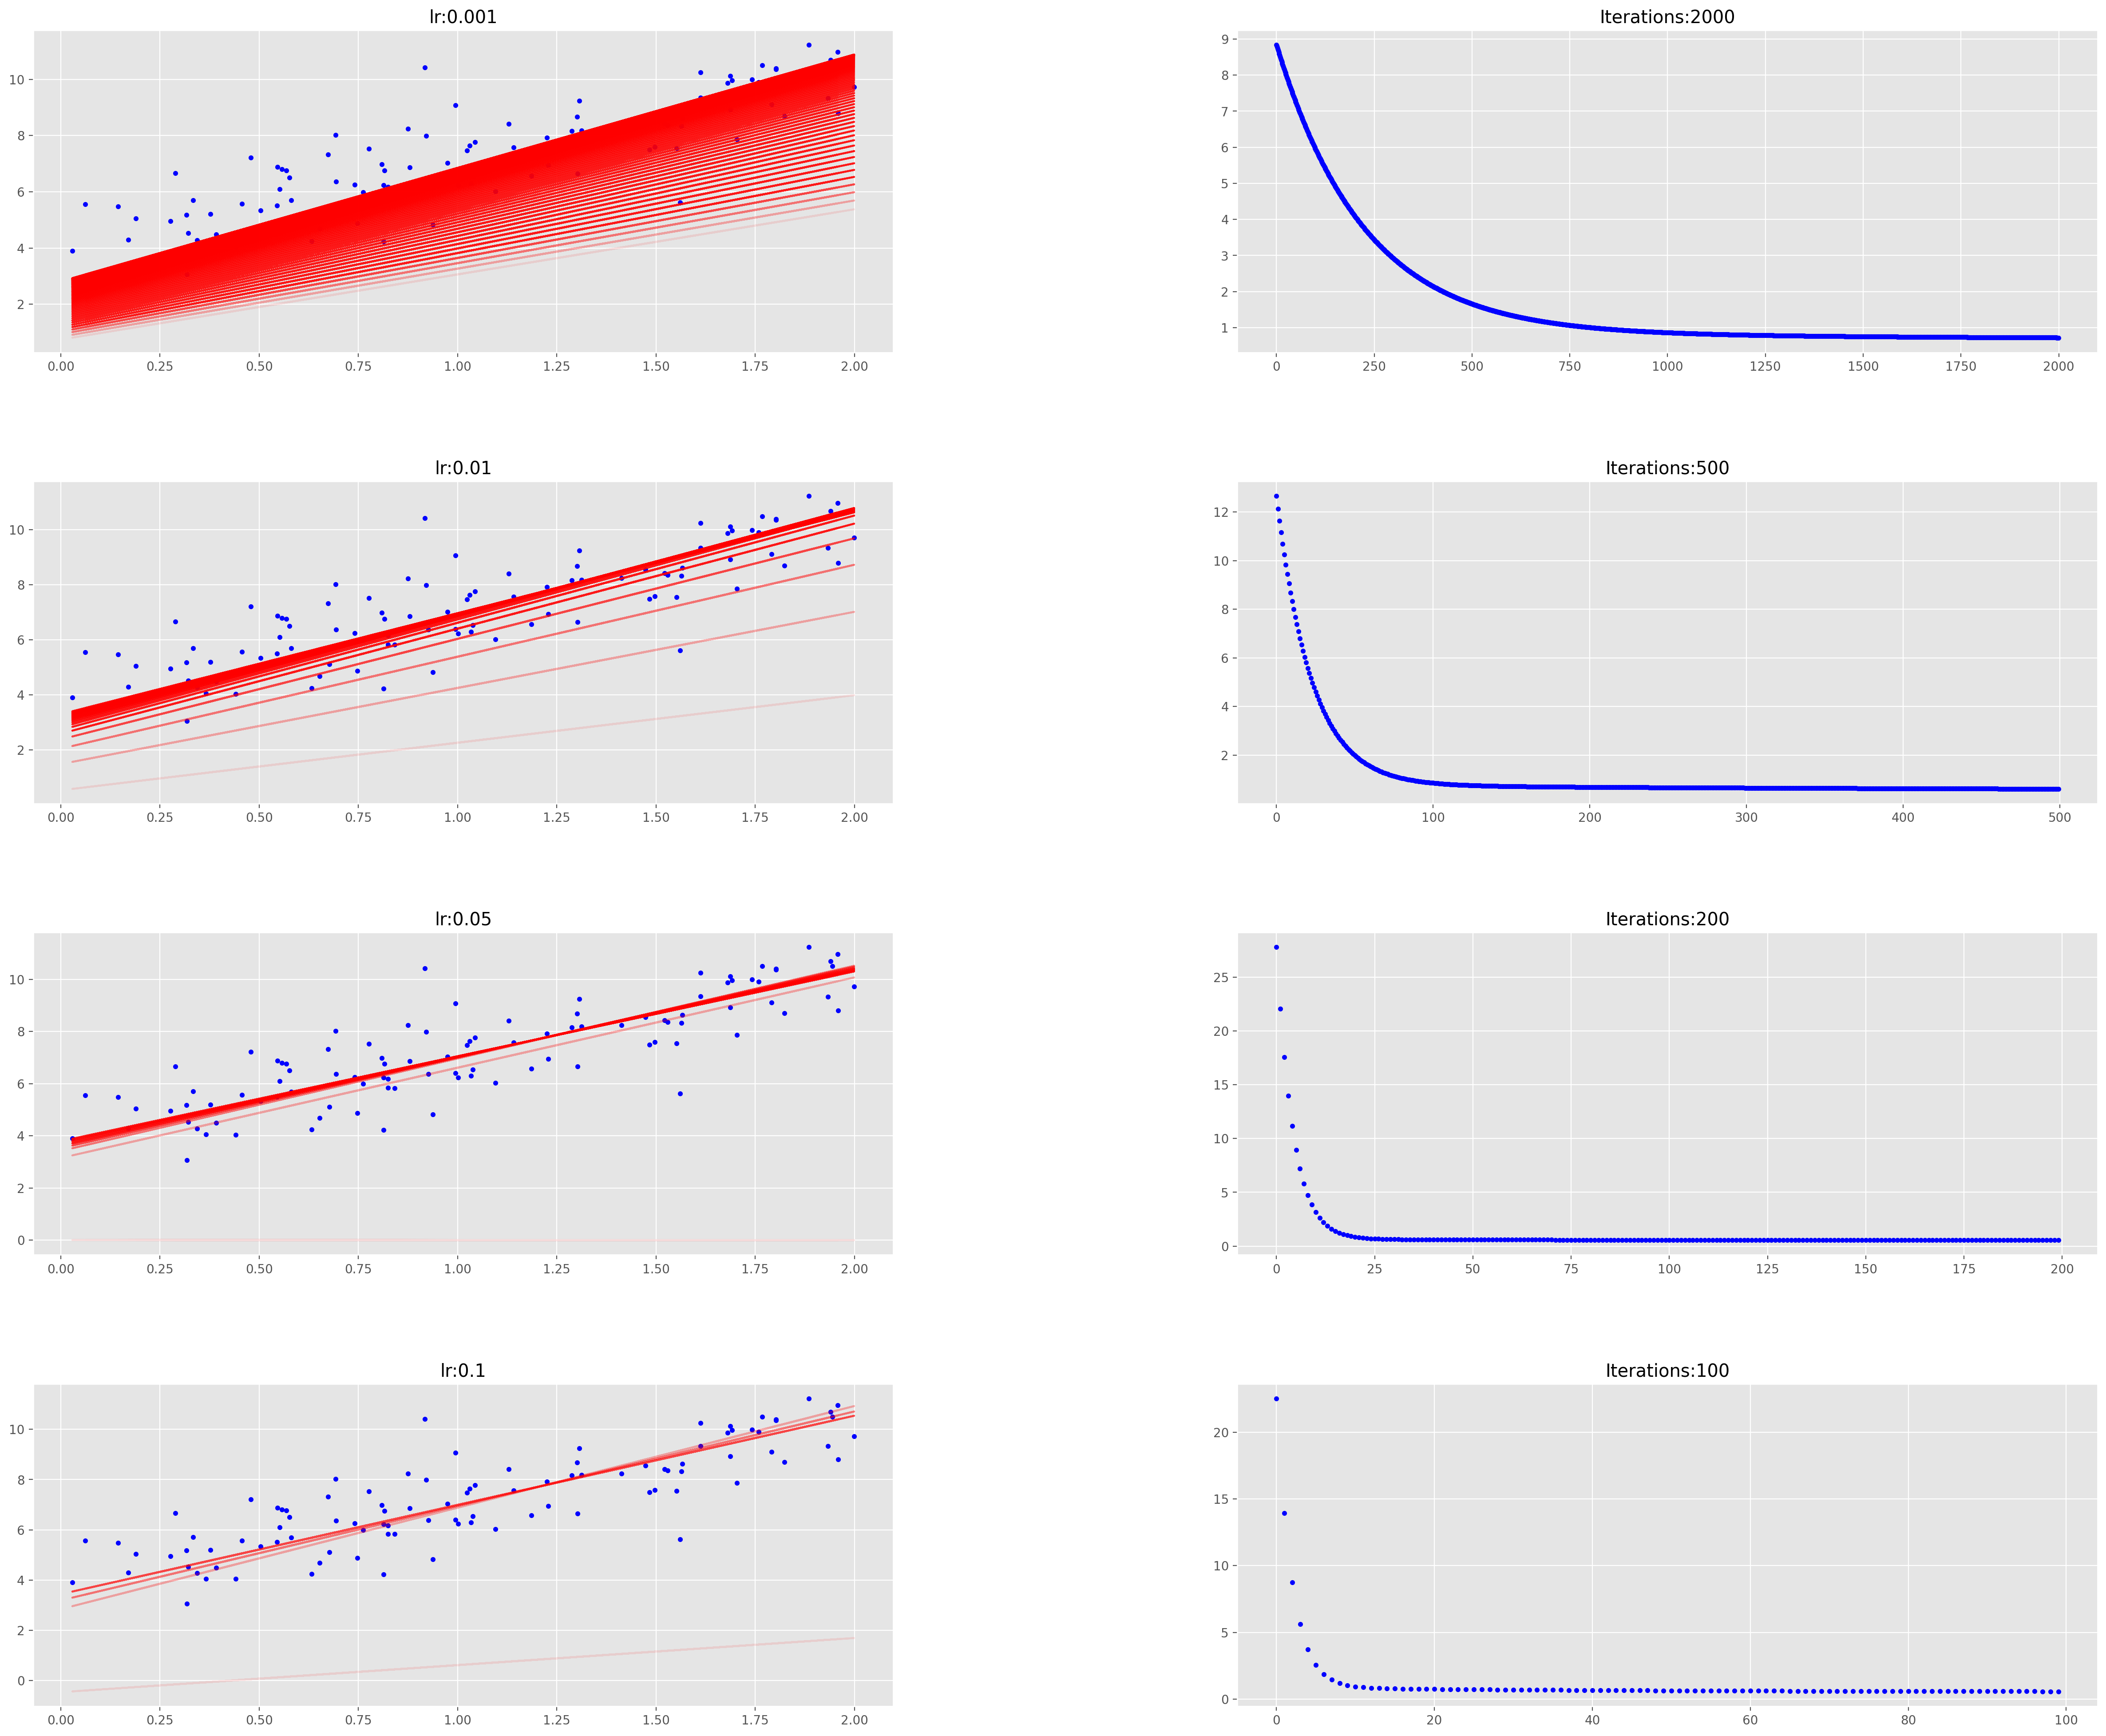

In [27]:
fig = plt.figure(figsize=(30,25),dpi=200)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr =[(2000,0.001),(500,0.01),(200,0.05),(100,0.1)]
count = 0
for n_iter, lr in it_lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count)
    count += 1
   
    ax1 = fig.add_subplot(4,2,count)
    
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter, lr, ax, ax1)